# Principal Component Analysis (PCA) Explained with NumPy, scikit-learn, and Matplotlib

This notebook provides another explanation of PCA, focusing on its geometric interpretation using rotation matrices and correlated random data.

## What is PCA?
Principal Component Analysis (PCA) is a statistical technique invented by Karl Pearson in 1901. It uses orthogonal transformations to map a set of variables into linearly uncorrelated variables called Principal Components. PCA is based on the Singular Value Decomposition (SVD) of the covariance matrix. The eigenvectors form a rotation matrix, sorted by explained variance (eigenvalues).

## Imports
Let's import the libraries we'll use.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import math
import random

## Perfectly Correlated Variables
Let's start with two random variables x and y, where y = n * x. This means x and y are perfectly correlated.

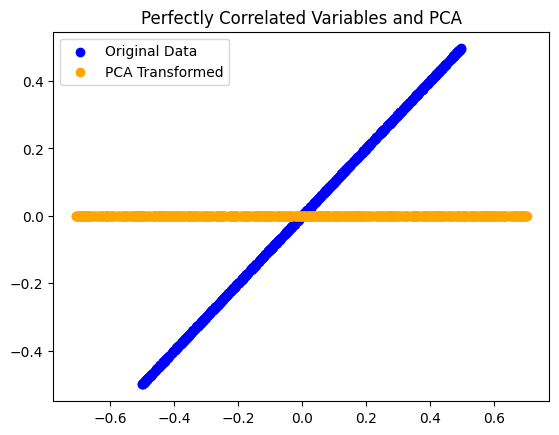

In [3]:
np.random.seed(1)
n = 1
x = np.random.uniform(1, 2, 1000)
y = x.copy() * n
# Center the data
x = x - np.mean(x)
y = y - np.mean(y)
data = pd.DataFrame({'x': x, 'y': y})
plt.scatter(data.x, data.y, color='blue', label='Original Data')
pca = PCA(n_components=2)
pcaTr = pca.fit(data)
rotatedData = pcaTr.transform(data)
dataPCA = pd.DataFrame(data=rotatedData, columns=['PC1', 'PC2'])
plt.scatter(dataPCA.PC1, dataPCA.PC2, color='orange', label='PCA Transformed')
plt.legend()
plt.title('Perfectly Correlated Variables and PCA')
plt.show()

## PCA Model: Rotation Matrix and Explained Variance
Let's inspect the rotation matrix (eigenvectors) and explained variance (eigenvalues).

In [4]:
print('Eigenvectors (principal components):')
print(pcaTr.components_)
print()
print('Explained variance (eigenvalues):')
print(pcaTr.explained_variance_)

Eigenvectors (principal components):
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]

Explained variance (eigenvalues):
[0.16646523 0.        ]


The rotation matrix matches the direction of the original variables. The explained variance is the sum of the variances of x and y.

## Correlated Normal Random Variables
Now let's create two normal random variables with different variances and a specific covariance, using a rotation matrix.

angle (degrees): 45.0
rotationMatrix:
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


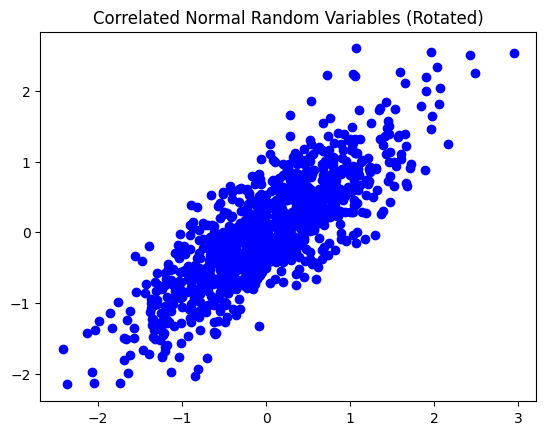

In [5]:
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
np.random.seed(100)
std1 = 1
std2 = 0.333
x = np.random.normal(0, std1, 1000)
y = np.random.normal(0, std2, 1000)
x = x - np.mean(x)
y = y - np.mean(y)
n = 1
angle = np.arctan(1 / n)
print('angle (degrees):', angle * 180 / math.pi)
rotationMatrix = np.array([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]])
print('rotationMatrix:')
print(rotationMatrix)
xy = np.concatenate(([x], [y]), axis=0).T
data = np.dot(xy, rotationMatrix)
plt.scatter(data[:,0], data[:,1], color='blue')
plt.title('Correlated Normal Random Variables (Rotated)')
plt.show()

## PCA on Correlated Data
Let's apply PCA to the rotated data and plot the principal components.

Eigenvectors (principal components):
[[ 0.70827652  0.7059351 ]
 [-0.7059351   0.70827652]]

Explained variance (eigenvalues):
[1.09488457 0.11243237]


C:\Users\Dell\AppData\Local\Temp\ipykernel_26152\2929119525.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, rotationMatrix[0][0] * std1 * 3], [0, rotationMatrix[0][1] * std1 * 3], 'k-', color='red', label='PC1')
C:\Users\Dell\AppData\Local\Temp\ipykernel_26152\2929119525.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, rotationMatrix[1][0] * std2 * 3], [0, rotationMatrix[1][1] * std2 * 3], 'k-', color='green', label='PC2')


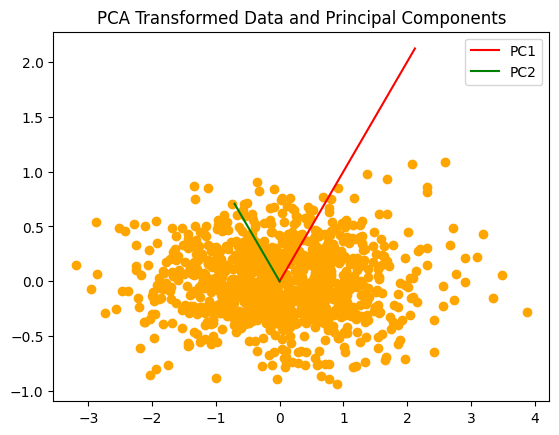

In [6]:
pca = PCA(n_components=2)
pcaTr = pca.fit(data)
dataPCA = pcaTr.transform(data)
print('Eigenvectors (principal components):')
print(pcaTr.components_)
print()
print('Explained variance (eigenvalues):')
print(pcaTr.explained_variance_)
plt.scatter(dataPCA[:,0], dataPCA[:,1], color='orange')
# Plot principal component axes
plt.plot([0, rotationMatrix[0][0] * std1 * 3], [0, rotationMatrix[0][1] * std1 * 3], 'k-', color='red', label='PC1')
plt.plot([0, rotationMatrix[1][0] * std2 * 3], [0, rotationMatrix[1][1] * std2 * 3], 'k-', color='green', label='PC2')
plt.legend()
plt.title('PCA Transformed Data and Principal Components')
plt.show()

The PCA transformation finds the rotation matrix that uncorrelates the variables. The explained variance matches the variances of the original random variables.

## PCA for Dimensionality Reduction
Let's project the data onto the principal component axes.

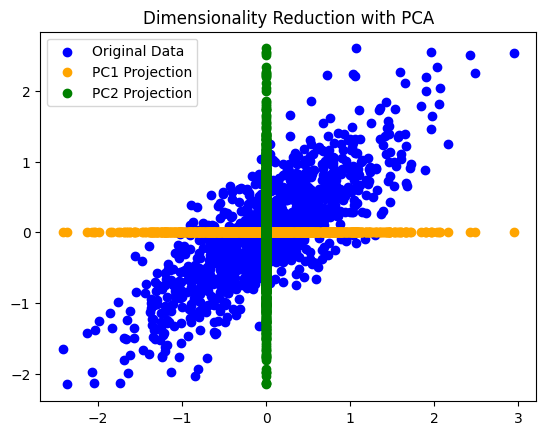

In [7]:
nPoints = len(data)
plt.scatter(data[:,0], data[:,1], color='blue', label='Original Data')
plt.scatter(data[:,0], np.zeros(nPoints), color='orange', label='PC1 Projection')
plt.scatter(np.zeros(nPoints), data[:,1], color='green', label='PC2 Projection')
plt.legend()
plt.title('Dimensionality Reduction with PCA')
plt.show()

## PCA for Complex Data
PCA can reduce hundreds or thousands of features to just a few principal components, making it easier to visualize and separate classes (e.g., cats vs. dogs).